## Airbnb(New York City)
---
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)   
    <참고> : 6. 지도학습(회귀) 노드의 6-8. 평가(회귀) 스텝에서 복습하실 수 있습니다.
- 데이터 출처 바로가기 / License CC0: Public Domain

### 1. Baseline
라이브러리와 데이터 불러오기

In [1]:
# 라이브러리 
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### 2. EDA(탐색적 데이터 분석)
탐색적으로 데이터 살펴보기

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31122.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,152.751150,6.990720,23.272855,1.372444,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,241.752501,20.310323,44.589170,1.683963,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,105.000000,2.000000,5.000000,0.710000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,175.000000,5.000000,23.000000,2.010000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

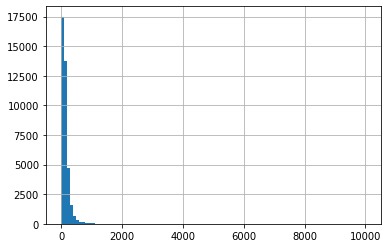

In [9]:
# target(hist)
train['price'].hist(bins=100)

In [10]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [12]:
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [13]:
train['room_type'].value_counts()

Entire home/apt    20299
Private room       17876
Shared room          941
Name: room_type, dtype: int64

In [14]:
train['neighbourhood_group'].value_counts()

Manhattan        17331
Brooklyn         16081
Queens            4530
Bronx              884
Staten Island      290
Name: neighbourhood_group, dtype: int64

In [15]:
train['neighbourhood'].value_counts()

Williamsburg          3099
Bedford-Stuyvesant    2953
Harlem                2114
Bushwick              1981
Hell's Kitchen        1557
                      ... 
Silver Lake              1
Richmondtown             1
Willowbrook              1
New Dorp                 1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

### 3. 데이터 전처리
데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

**성능향상 Tip1**

price의 범위가 너무 크기 때문에 log를 취하여 정규화 한다.

<AxesSubplot:>

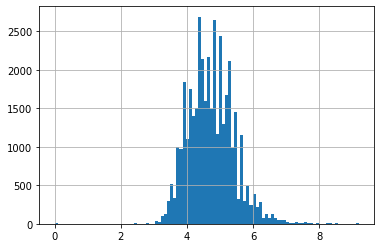

In [16]:
import numpy as np
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [17]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [18]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [19]:
# 결측치(train)
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [20]:
# 결측치(test)
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

**성능향상 Tip2**

수치형 데이터를 정규화한다.

피쳐별로 범위가 많이 차이나기 때문에 **MinMaxScaler**를 사용한다.

In [22]:
# 수치형 피쳐 선택
n_train = train.select_dtypes(include='number').copy()
n_test = test.select_dtypes(include='number').copy()

display(n_train.select_dtypes(include='number').head(2))
display(n_test.select_dtypes(include='number').head(2))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,3,3,0.09,2,0
1,9458704,49015331,40.76037,-73.99016,2,64,1.68,2,262


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,33771081,40.70959,-73.94652,3,2,0.31,1,0
1,971247,5308961,40.79368,-73.96487,3,159,2.09,1,244


In [23]:
# id 컬럼 삭제 - id 컬럼은 숙소의 가격과는 관계 X
n_train = n_train.drop('id', axis=1)
n_test = n_test.drop('id', axis=1)

In [24]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

display(n_train.head(1))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(1))

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,94219511,40.80167,-73.95781,3,3,0.09,2,0


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.0


**성능향상 Tip3**

범주형 데이터를 수치형 데이터로 변경한다.

1. [neighbourhood_group, neighbourhood, room_type]를 label encoding
2. [name, host_name] 컬럼 삭제

In [25]:
# 범주형 피쳐 선택
c_train = train.select_dtypes(include='object').copy()
c_test = test.select_dtypes(include='object').copy()

display(c_train.select_dtypes(include='object').head(2))
display(c_test.select_dtypes(include='object').head(2))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room
1,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,Manhattan,Hell's Kitchen,Entire home/apt


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,"Cozy and Sunny Room Williamsburg, Luxury Building",Rémy,Brooklyn,Williamsburg,Private room
1,Sunny Artist Live/Work Apartment,Larry,Manhattan,Upper West Side,Entire home/apt


In [26]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [27]:
# 범주형 변수 -> 수치형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type'
        ]

display(c_train.head(1))
display(c_test.head(1))

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

display(c_train.head(1))
display(c_test.head(1))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,"Cozy and Sunny Room Williamsburg, Luxury Building",Rémy,Brooklyn,Williamsburg,Private room


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,"Cozy and Sunny Room Williamsburg, Luxury Building",Rémy,1,214,1


In [28]:
# name, host_name 컬럼 삭제
c_train = c_train.drop(['name', 'host_name'], axis=1)
c_test = c_test.drop(['name', 'host_name'], axis=1)

In [29]:
# 분리한 데이터 다시 합침
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)
print(train.shape, test.shape)
display(train.head())
display(test.head())

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.343458,0.731742,0.539318,0.001601,0.004769,0.001538,0.003067,0.000000,2,94,1
1,0.178671,0.631633,0.478445,0.000801,0.101749,0.028718,0.003067,0.717808,2,95,0
2,0.001595,0.558041,0.449354,0.047238,0.001590,0.003419,0.000000,0.000000,2,209,0
3,0.013033,0.464162,0.579361,0.002402,0.379968,0.049402,0.003067,0.002740,1,13,0
4,0.045468,0.458611,0.543571,0.021617,0.000000,0.000000,0.000000,0.000000,1,13,1


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.123100,0.508544,0.560563,0.001601,0.003180,0.005299,0.000000,0.000000,1,214,1
1,0.019344,0.712374,0.526034,0.001601,0.252782,0.035726,0.000000,0.668493,2,202,0
2,0.001154,0.454321,0.529759,0.000000,0.085851,0.011111,0.009202,1.000000,1,41,0
3,0.007034,0.457641,0.534539,0.001601,0.003180,0.002222,0.000000,0.000000,1,41,0
4,0.285519,0.741583,0.554128,0.000000,0.254372,0.073675,0.006135,0.673973,2,94,0


### 4. 검증 데이터 분리
Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [30]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split


# Train과 Validation 세트로 분리 (80%는 학습에 사용하고, 20%는 검증에 사용)
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((31292, 11), (7824, 11), (31292,), (7824,))

In [31]:
display(X_train.head())
display(X_val.head())
display(y_train.head())
display(y_val.head())

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
16787,0.086115,0.456963,0.612988,0.001601,0.001590,0.001538,0.0,0.000000,1,28,1
26663,0.384158,0.859193,0.580641,0.000000,0.017488,0.010256,0.0,0.084932,2,206,1
22132,0.063525,0.466125,0.470824,0.000801,0.001590,0.000855,0.0,0.000000,1,25,1
7756,0.513850,0.768828,0.568598,0.023219,0.000000,0.000000,0.0,0.120548,2,94,1
35587,0.077100,0.452697,0.608359,0.000801,0.050874,0.088205,0.0,0.156164,1,13,0


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
34774,0.964539,0.722797,0.573359,0.000000,0.000000,0.000000,0.000000,0.043836,2,61,0
6129,0.911084,0.574573,0.482208,0.003203,0.017488,0.067179,0.000000,0.772603,2,86,0
29325,0.071931,0.515016,0.547542,0.002402,0.000000,0.000000,0.000000,0.000000,1,214,0
28112,0.130959,0.519864,0.481136,0.000801,0.047695,0.024444,0.027607,0.942466,2,119,1
13003,0.015663,0.781942,0.543966,0.000801,0.076312,0.010427,0.009202,0.312329,2,94,1


16787    3.433987
26663    4.394449
22132    4.787492
7756     3.688879
35587    4.836282
Name: price, dtype: float64

34774    3.931826
6129     6.552508
29325    5.198497
28112    4.454347
13003    4.110874
Name: price, dtype: float64

### 5. 머신러닝
<참고> : 6. 지도학습(회귀) 노드에서 프로젝트에 활용된 회귀 모델을 복습하실 수 있습니다.

In [32]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_val)
linear_pred = np.expm1(linear_pred)

mean_squared_error(y_val, linear_pred)

17847.246821522887

In [33]:
# 릿지 회귀
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_val)
ridge_pred = np.expm1(ridge_pred)

mean_squared_error(y_val, ridge_pred)

17829.74030552302

In [34]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_val)
lasso_pred = np.expm1(lasso_pred)

mean_squared_error(y_val, lasso_pred)

11928.698130033947

In [35]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_val)
elastic_pred = np.expm1(elastic_pred)

mean_squared_error(y_val, elastic_pred)

11961.380668636748

In [36]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_pred = np.expm1(rf_pred)

mean_squared_error(y_val, rf_pred)

23374.851852282525

In [37]:
# xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_pred = np.expm1(xgb_pred)

mean_squared_error(y_val, xgb_pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


23220.66681850559

### 6. 채점

In [38]:
test.shape

(9779, 11)

In [48]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 머신러닝(회귀)
line_pred = linear_model.predict(test)
line_pred = np.expm1(line_pred)
line_mse = mean_squared_error(y_test, line_pred).round(2)
line_mse

50188.87

In [49]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 릿지 회귀
ridge_pred = ridge_model.predict(test)
ridge_pred = np.expm1(ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred).round(2)
ridge_mse

50188.31

In [50]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 라쏘 회귀
lasso_pred = lasso_model.predict(test)
lasso_pred = np.expm1(lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred).round(2)
lasso_mse

55895.93

In [51]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# 엘라스틱넷
elastic_pred = elastic_model.predict(test)
elastic_pred = np.expm1(elastic_pred)
elastic_mse = mean_squared_error(y_test, elastic_pred).round(2)
elastic_mse

55880.39

In [52]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# RandomForest
rf_pred = rf_model.predict(test)
rf_pred = np.expm1(rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred).round(2)
rf_mse

43760.79

In [53]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
xgb_pred = xgb_model.predict(test)
xgb_pred = np.expm1(xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred).round(2)
xgb_mse

43118.1

In [56]:
mse = min(line_mse, ridge_mse, lasso_mse, elastic_mse, rf_mse, xgb_mse)

In [55]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요! 
print(f"나의 점수는 {mse}입니다.")

나의 점수는 43118.1입니다.


### 5-2. 하이퍼파라미터 튜닝

In [46]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 하이퍼파라미터
params = {
    'learning_rate':[0.05, 0.03, 0.01],
    'n_estimators':[200, 250, 300, 400],
    'subsample':[0.8, 0.7, 0.6]
}

In [47]:
# RandomizedSearchCV
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=5, n_jobs=-1, verbose=3)
grid.fit(train, target)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_